## Import Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [42]:
#Loading the dataset
df = pd.read_csv("Indian_Kids_Screen_Time.CSV")
df.head(10)

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban
5,14,Female,4.88,Smartphone,True,0.44,Poor Sleep,Urban
6,17,Male,2.97,TV,False,0.48,NaN,Rural
7,10,Male,2.74,TV,True,0.54,NaN,Urban
8,14,Male,4.61,Laptop,True,0.36,"Poor Sleep, Anxiety",Rural
9,18,Male,3.24,Tablet,True,0.48,"Poor Sleep, Obesity Risk",Urban


## Handle Missing Values and Inconsistent Categories

In [43]:
# Check missing values
print("Missing values before handling:\n", df.isnull().sum(), "\n")

Missing values before handling:
 Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64 



In [44]:
# Option 1: Fill missing numerical values with mean
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

# Option 2: Handling missing categorical values 
# Replace NaN/null in Health_Impacts with "No health impact"
df["Health_Impacts"] = df["Health_Impacts"].fillna("No health impact")

# Verify changes
print(df["Health_Impacts"].isnull().sum())  # should be 0 now
print(df["Health_Impacts"].value_counts().head())

0
Health_Impacts
No health impact          3218
Poor Sleep                2268
Poor Sleep, Eye Strain     979
Eye Strain                 644
Poor Sleep, Anxiety        608
Name: count, dtype: int64


In [45]:
# Optional: Verify changes
print("After cleaning:\n", df.head())

After cleaning:
    Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
0   14    Male                      3.99     Smartphone   
1   11  Female                      4.61         Laptop   
2   18  Female                      3.73             TV   
3   15  Female                      1.21         Laptop   
4   12  Female                      5.89     Smartphone   

   Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
0                        True                               0.42   
1                        True                               0.30   
2                        True                               0.32   
3                       False                               0.39   
4                        True                               0.49   

           Health_Impacts Urban_or_Rural  
0  Poor Sleep, Eye Strain          Urban  
1              Poor Sleep          Urban  
2              Poor Sleep          Urban  
3        No health impact          Urban  
4   

In [46]:
print("Missing values after handling:\n", df.isnull().sum(), "\n")

Missing values after handling:
 Age                                  0
Gender                               0
Avg_Daily_Screen_Time_hr             0
Primary_Device                       0
Exceeded_Recommended_Limit           0
Educational_to_Recreational_Ratio    0
Health_Impacts                       0
Urban_or_Rural                       0
dtype: int64 



## Create derived fields

In [51]:
#Create Age Bands
bins = [8, 12, 16, 18]  # boundaries
labels = ["Pre-teens", "Teenagers", "Late teens"]

# Create new column Age_Band
df["Age_Band"] = pd.cut(df["Age"], bins=bins, labels=labels, include_lowest=True)

# Verify result
print(df[["Age", "Age_Band"]].head(10))

   Age    Age_Band
0   14   Teenagers
1   11   Pre-teens
2   18  Late teens
3   15   Teenagers
4   12   Pre-teens
5   14   Teenagers
6   17  Late teens
7   10   Pre-teens
8   14   Teenagers
9   18  Late teens


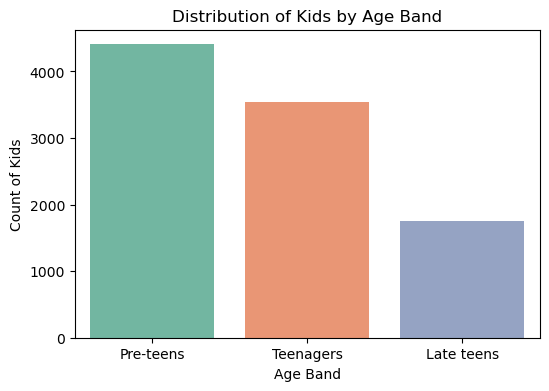

In [52]:
#Age Band Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Age_Band", data=df, hue="Age_Band", palette="Set2", legend=False)
plt.title("Distribution of Kids by Age Band")
plt.xlabel("Age Band")
plt.ylabel("Count of Kids")
plt.show()

## Categorization of Health_Impact Column

In [53]:
physical = ["Eye Strain","Headache","Poor Posture","Obesity","Fatigue"]
mental = ["Poor Sleep","Anxiety","Stress","Depression","Addiction"]

df["Health_Impact_Category"] = df["Health_Impacts"].apply(
    lambda x: "No Impact" if x=="None" 
    else "Physical&Mental" if any(p in x for p in physical) and any(m in x for m in mental)
    else "Physical" if any(p in x for p in physical)
    else "Mental" if any(m in x for m in mental)
    else "No Impact"
)
df.head(10)

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Band,Health_Impact_Category
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,Teenagers,Physical&Mental
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,Pre-teens,Mental
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,Late teens,Mental
3,15,Female,1.21,Laptop,False,0.39,No health impact,Urban,Teenagers,No Impact
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,Pre-teens,Mental
5,14,Female,4.88,Smartphone,True,0.44,Poor Sleep,Urban,Teenagers,Mental
6,17,Male,2.97,TV,False,0.48,No health impact,Rural,Late teens,No Impact
7,10,Male,2.74,TV,True,0.54,No health impact,Urban,Pre-teens,No Impact
8,14,Male,4.61,Laptop,True,0.36,"Poor Sleep, Anxiety",Rural,Teenagers,Mental
9,18,Male,3.24,Tablet,True,0.48,"Poor Sleep, Obesity Risk",Urban,Late teens,Physical&Mental


In [33]:
# Categorize Primary_Device
df["Device_Category"] = df["Primary_Device"].apply(
    lambda x: "Wallmounted device" if x == "TV" else "Portable device"
)

# Verify result
print(df[["Primary_Device", "Device_Category"]].head(10))
print(df["Device_Category"].value_counts())

  Primary_Device     Device_Category
0     Smartphone     Portable device
1         Laptop     Portable device
2             TV  Wallmounted device
3         Laptop     Portable device
4     Smartphone     Portable device
5     Smartphone     Portable device
6             TV  Wallmounted device
7             TV  Wallmounted device
8         Laptop     Portable device
9         Tablet     Portable device
Device_Category
Portable device       7225
Wallmounted device    2487
Name: count, dtype: int64


##creating derived fields : age bands, weekday/weekend flags, device/activity shares , formating any date/time fields

In [54]:
# Define approximate screen sizes for devices
screen_sizes = {
    "Smartphone": 6,
    "Laptop": 15,
    "Tablet": 10,
    "TV": 40   # assuming average TV size ~40 inches
}

# Map screen sizes to a new column
df["Screen_Size"] = df["Primary_Device"].map(screen_sizes)

# Categorize based on screen size
df["Screen_Harm_Category"] = df["Screen_Size"].apply(
    lambda x: "Harmful" if x < 30 else "More Harmful"
)

# Verify result
print(df[["Primary_Device", "Screen_Size", "Screen_Harm_Category"]].head(10))
print(df["Screen_Harm_Category"].value_counts())

  Primary_Device  Screen_Size Screen_Harm_Category
0     Smartphone            6              Harmful
1         Laptop           15              Harmful
2             TV           40         More Harmful
3         Laptop           15              Harmful
4     Smartphone            6              Harmful
5     Smartphone            6              Harmful
6             TV           40         More Harmful
7             TV           40         More Harmful
8         Laptop           15              Harmful
9         Tablet           10              Harmful
Screen_Harm_Category
Harmful         7225
More Harmful    2487
Name: count, dtype: int64


In [35]:
# Get column names as a list
column_names_list = df.columns.tolist()
print("\nColumn names (list):")
column_names_list


Column names (list):


['Age',
 'Gender',
 'Avg_Daily_Screen_Time_hr',
 'Primary_Device',
 'Exceeded_Recommended_Limit',
 'Educational_to_Recreational_Ratio',
 'Health_Impacts',
 'Urban_or_Rural',
 'Age_Band',
 'Health_Impact_Category',
 'Educational_Share',
 'Recreational_Share',
 'Device_Category',
 'Screen_Size',
 'Screen_Harm_Category']

In [36]:
#Device Share (Proportion of each device used)
# Count device usage and calculate share
device_share = df["Primary_Device"].value_counts(normalize=True) * 100
print("Device Share(% of kids using each device):\n", device_share, "\n")

Device Share(% of kids using each device):
 Primary_Device
Smartphone    47.034596
TV            25.607496
Laptop        14.754942
Tablet        12.602965
Name: proportion, dtype: float64 



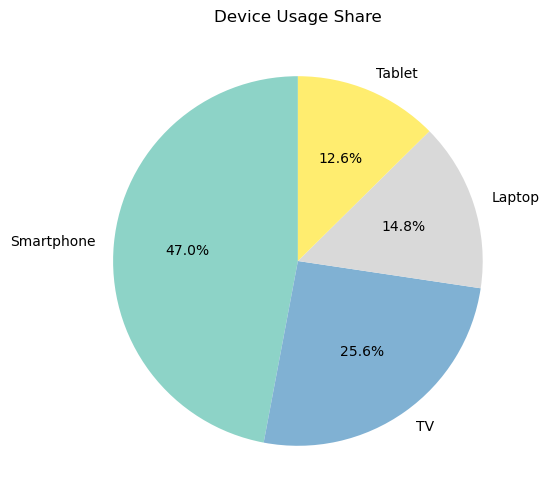

In [55]:
#Device Share
plt.figure(figsize=(6,6))
device_share.plot(kind="pie", autopct="%.1f%%", startangle=90, colormap="Set3")
plt.title("Device Usage Share")
plt.ylabel("")
plt.show()

## Activity Share

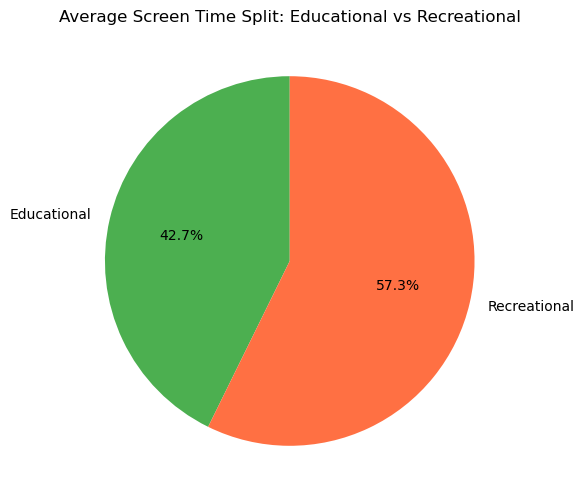

In [57]:
#Educational vs Recreational Share
df["Educational_Share"] = df["Educational_to_Recreational_Ratio"]
df["Recreational_Share"] = 1 - df["Educational_to_Recreational_Ratio"]
avg_activity_share = {
    "Educational": df["Educational_Share"].mean() * 100,
    "Recreational": df["Recreational_Share"].mean() * 100
}

plt.figure(figsize=(6,6))
plt.pie(avg_activity_share.values(), labels=avg_activity_share.keys(),
        autopct="%.1f%%", startangle=90, colors=["#4CAF50", "#FF7043"])
plt.title("Average Screen Time Split: Educational vs Recreational")
plt.show()

## Save Preprocessed data for reuse

In [58]:
# Save Preprocessed Dataset
df.to_csv("Indian_Kids_Screen_Time_Preprocessed.csv", index=False)

print("Preprocessed dataset saved successfully!")

Preprocessed dataset saved successfully!


## OBSERVATIONS

In [ ]:
1. Fisrt load the dataset.
2. Check for null/nan values in each column. I found 3218 null/nan values present in Health_Impacts Categorical Column.
3. Handle these null/nan values with filling "No Health Impact".
4. Then we create Age_Band Column By grouping of Age(Age Column) in [8, 12, 16, 18] into ["Pre-teens", "Teenagers", "Late teens"].
5. After that I Categorize the Health_Impact Column data into "Physical&Mental", "Physical", "Mental", "No Impact".
6. Then we Categorize the Primay_device column into Wallmounted device and portable device.
7. After that I calculate the device share of Kids, Then I found Smartphone 47%, TV 25.6%, Laptop 14.7% and Tablet 12.6% used By Kids.
8. After that I also Calculate the Activity Share of Kids, Then I found 42.7% of Time used in Education and 57.3% of time used in Recreational.
9. Saved the updated dataset for further analysis.